In [7]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as  plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [9]:
#membaca file
df = pd.read_csv("../data/stunting_wasting_dataset.csv")
df.head()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting
0,Laki-laki,19,91.6,13.3,Tall,Risk of Overweight
1,Laki-laki,20,77.7,8.5,Stunted,Underweight
2,Laki-laki,10,79.0,10.3,Normal,Risk of Overweight
3,Perempuan,2,50.3,8.3,Severely Stunted,Risk of Overweight
4,Perempuan,5,56.4,10.9,Severely Stunted,Risk of Overweight


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis Kelamin      100000 non-null  object 
 1   Umur (bulan)       100000 non-null  int64  
 2   Tinggi Badan (cm)  100000 non-null  float64
 3   Berat Badan (kg)   100000 non-null  float64
 4   Stunting           100000 non-null  object 
 5   Wasting            100000 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 4.6+ MB


In [12]:
#cek missing value
df.isnull().sum()

Jenis Kelamin        0
Umur (bulan)         0
Tinggi Badan (cm)    0
Berat Badan (kg)     0
Stunting             0
Wasting              0
dtype: int64

In [14]:
#cek duplicate
df.duplicated().sum()


np.int64(7308)

In [16]:
#menghapus data duplicat
df = df.drop_duplicates()

In [18]:
#cek duplicat ulang setelah menghapus
df.duplicated().sum()

np.int64(0)

In [82]:
df = df.rename(columns={
    'Jenis Kelamin':'jenis_kelamin',
    'Umur (bulan)':'umur_bulan',
    'Tinggi Badan (cm)':'tinggi_cm',
    'Berat Badan (kg)':'berat_kg',
    'Stunting':'stunting',
    'Wasting':'wasting',
})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92692 entries, 0 to 99997
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   jenis_kelamin  92692 non-null  int8   
 1   umur_bulan     92692 non-null  int64  
 2   tinggi_cm      92692 non-null  float64
 3   berat_kg       92692 non-null  float64
 4   stunting       92692 non-null  int8   
 5   wasting        92692 non-null  int8   
dtypes: float64(2), int64(1), int8(3)
memory usage: 3.1 MB


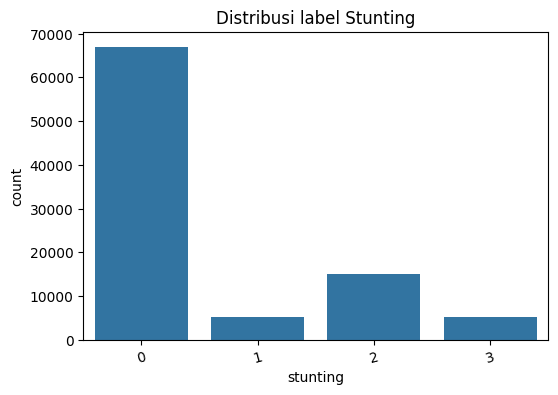

In [83]:
plt.figure(figsize=(6,4))
sns.countplot(x='stunting', data=df)
plt.title('Distribusi label Stunting')
plt.xticks(rotation=15)
plt.show()

In [51]:
# mapping label -> kode untuk target
stunting_cat = df['stunting'].astype('category')
stunting_classes = list(stunting_cat.cat.categories) #urutan kelas
df['stunting'] = stunting_cat.cat.codes #y numerik

# fitur kategoriakal lain (jenis_kelamin, wasting) ->kode juga
for col in ['jenis_kelamin','wasting']:
    if col in df.columns:
        df[col] = df[col].astype('category').cat.codes


df.head()

,jenis_kelamin,umur_bulan,tinggi_cm,berat_kg,stunting,wasting
0,0,19,91.6,13.3,3,1
1,0,20,77.7,8.5,2,3
2,0,10,79.0,10.3,0,1
3,1,2,50.3,8.3,1,1
4,1,5,56.4,10.9,1,1


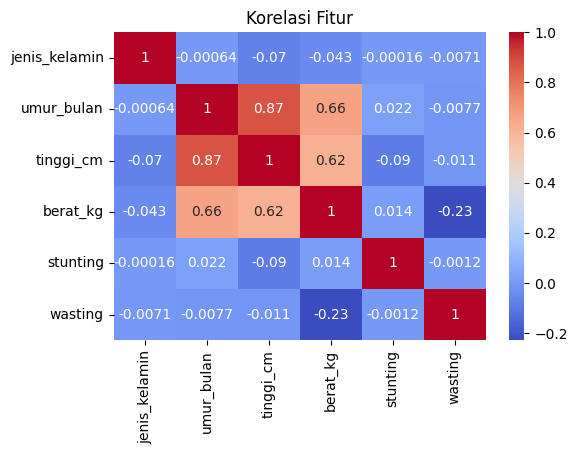

In [52]:
#korelasi
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Fitur')
plt.show()

In [7]:
# Meimlih fitur dataset
feature_cols = ['umur_bulan','tinggi_cm','berat_kg','wasting']
X = df[feature_cols]
y = df['stunting']

NameError: name 'df' is not defined